In [66]:
from model import DNServer, Node
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
def createNode(NUMBER_OF_NODE, probabity,offset=0, isAttacker=False):
    nodeList = []
    for i in range(offset, offset+ NUMBER_OF_NODE):
        node = Node(i,correctSendingProbability=probabity, isAttacker=isAttacker)
        nodeList.append(node)
    return nodeList

def getTrustStatesCounts(data):
    results = np.zeros(5)
    for i in range(1,6):
        results[i-1] = len(data[3][data[3]==i])
    return results

def plotPie(states,attacker,normal):
    plt.figure(figsize=(8, 6), dpi=80)
    plt.pie(states)
    plt.legend(["Fully Trustworthy","Trustworthy","Beginner","Suspicious","Untrusted"],loc=4)
    plt.show()

    plt.figure(figsize=(8, 6), dpi=80)
    plt.pie([attacker,normal])
    plt.legend(["Attacker","Normal"],loc=4)
    plt.show()

# Case 1 

In [3]:
NUMBER_OF_NODE = 100
NUMBER_OF_NODE_ATTACKER = 0
PROBABILITY = 0.95
DAYS = 4
nodes = createNode(100,0.95)

In [4]:
server = DNServer(nodes)
server.simulate(days=DAYS)
results,data =  server.getCurrentState()

100%|██████████| 5760/5760 [01:06<00:00, 86.32it/s] 


<AxesSubplot:title={'center':'Case 1 Trust Point Histogram'}, ylabel='Frequency'>

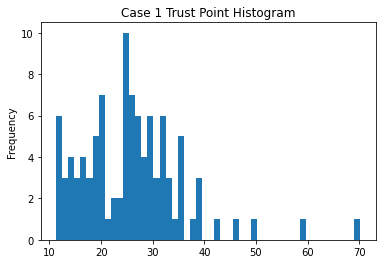

In [21]:
data[1].plot.hist(bins=50, title="Case 1 Trust Point Histogram")

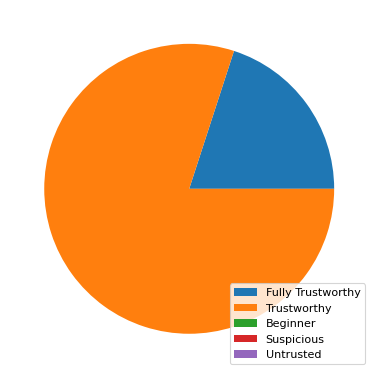

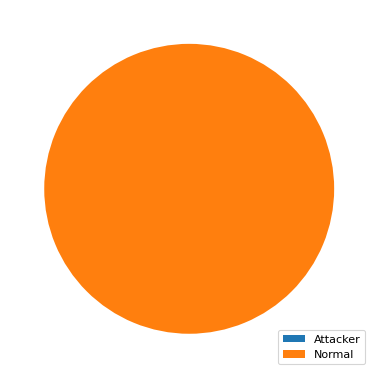

In [87]:
states = getTrustStatesCounts(data)
plotPie(states,NUMBER_OF_NODE_ATTACKER,NUMBER_OF_NODE)

In [90]:
print("Mean", data[1].mean())
print("STD", data[1].std())
print("Variance", data[1].var())

Mean 25.772047236775116
STD 9.892280499199684
Variance 97.85721347484636


# Case 2

In [96]:
NUMBER_OF_NODE = 100
NUMBER_OF_NODE_ATTACKER = 50
PROBABILITY = 0.95
nodes = createNode(NUMBER_OF_NODE,0.95)
nodesAttacker = createNode(NUMBER_OF_NODE_ATTACKER,0.7,isAttacker=True,offset=100)

In [97]:
# Normal Operation
server = DNServer(nodes)
server.simulate(days=4)

# Introduce the attackers to the system
server.nodes += nodesAttacker
server.simulate(days=1)

results,data =  server.getCurrentState()

100%|██████████| 1440/1440 [00:15<00:00, 94.27it/s] 


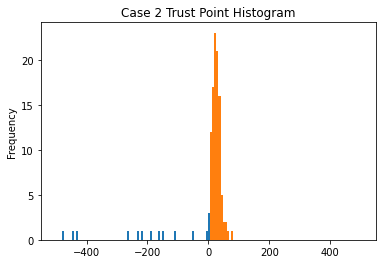

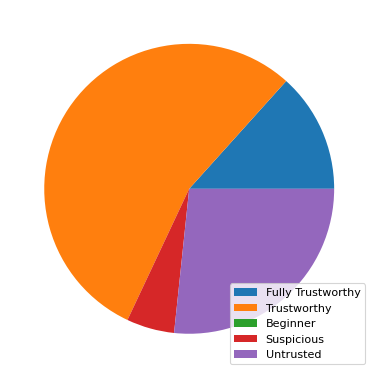

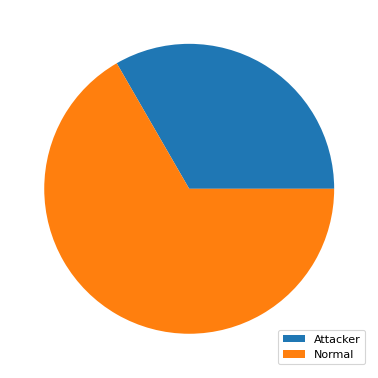

In [112]:
data[1][data[0]>=100].plot.hist(bins=150, title="Case 2 Trust Point Histogram",range=(-500,500))
data[1][data[0]<100].plot.hist(bins=150, title="Case 2 Trust Point Histogram",range=(-500,500))
states = getTrustStatesCounts(data)
plotPie(states,NUMBER_OF_NODE_ATTACKER,NUMBER_OF_NODE)

In [118]:
print("Mean of Normal Nodes", data[1][data[0]<100].mean())
print("Mean of Attacker Nodes", data[1][data[0]>=100].mean())
print("STD", data[1].std())
print("Variance", data[1].var())
print("Success %", data[4][data[0]<100].mean()*100)

Mean of Normal Nodes 27.456566887049252
Mean of Attacker Nodes -378757.93007464876
STD 684354.4082063418
Variance 468340956031.4522
Success % 97.90683333333334


# Case 3

In [121]:
nodes = createNode(25,0.95)
server = DNServer(nodes)
server.simulate(days=100)
results,data =  server.getCurrentState()

100%|██████████| 144000/144000 [04:42<00:00, 508.98it/s]


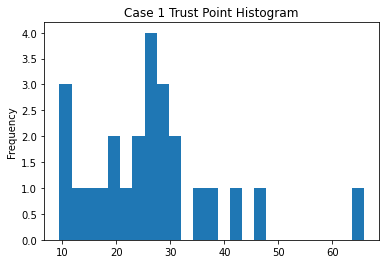

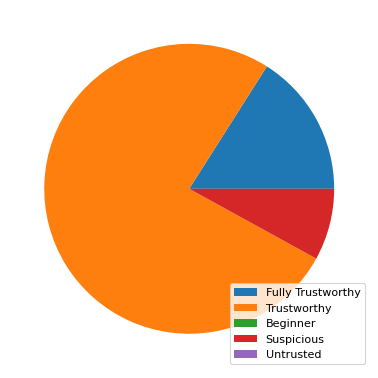

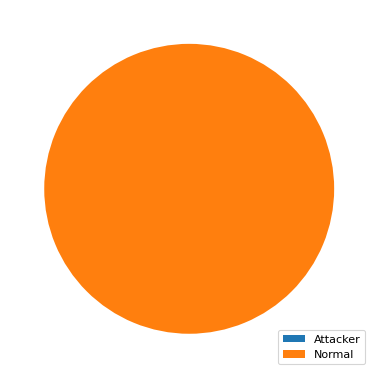

Mean 26.448067422573104
STD 12.570058661451565
Variance 158.00637475233353


In [126]:
data[1].plot.hist(bins=25, title="Case 1 Trust Point Histogram")
states = getTrustStatesCounts(data)
plotPie(states,0,25)
print("Mean", data[1].mean())
print("STD", data[1].std())
print("Variance", data[1].var())

# Case 4

In [127]:
NUMBER_OF_NODE = 100
NUMBER_OF_NODE_ATTACKER = 25
PROBABILITY = 0.95
nodes = createNode(NUMBER_OF_NODE,0.95)
nodesAttacker = createNode(NUMBER_OF_NODE_ATTACKER,0.7,isAttacker=True,offset=NUMBER_OF_NODE)

In [128]:
# Normal Operation
server = DNServer(nodes+nodesAttacker)
server.simulate(days=4)

results,data =  server.getCurrentState()

100%|██████████| 5760/5760 [00:49<00:00, 116.58it/s]


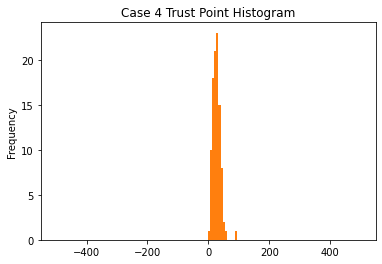

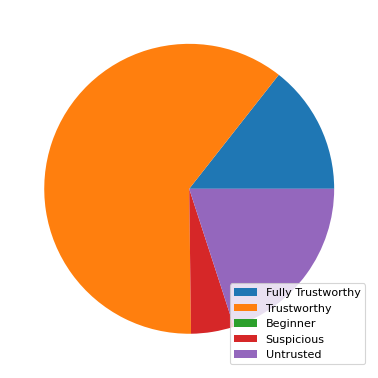

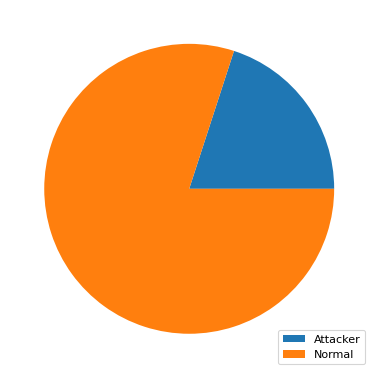

In [129]:
data[1][data[0]>=100].plot.hist(bins=150, title="Case 4 Trust Point Histogram",range=(-500,500))
data[1][data[0]<100].plot.hist(bins=150, title="Case 4 Trust Point Histogram",range=(-500,500))
states = getTrustStatesCounts(data)
plotPie(states,NUMBER_OF_NODE_ATTACKER,NUMBER_OF_NODE)

In [131]:
print("Mean of Normal Nodes", data[1][data[0]<100].mean())
print("Mean of Attacker Nodes", data[1][data[0]>=100].mean())
print("STD", data[1].std())
print("Variance", data[1].var())
print("Success %", data[4][data[0]<100].mean()*100)

Mean of Normal Nodes 27.11111772033566
Mean of Attacker Nodes -9.264097550333289e+21
STD 1.578997476836175e+22
Variance 2.4932330318550072e+44
Success % 98.52749999999999


# Case 5

In [ ]:
NUMBER_OF_NODE = 100
NUMBER_OF_NODE_ATTACKER = 25
PROBABILITY = 0.95
nodes = createNode(NUMBER_OF_NODE,0.95)
nodesAttacker = createNode(NUMBER_OF_NODE_ATTACKER,0.95,isAttacker=False,offset=100)

In [132]:
# Normal Operation
server = DNServer(nodes+nodesAttacker)
server.simulate(days=2)

for node in nodesAttacker:
    node.isAttacker = True
    node.correctSendingProbability = 0.7

server.simulate(days=2)

results,data =  server.getCurrentState()

100%|██████████| 2880/2880 [00:25<00:00, 115.07it/s]


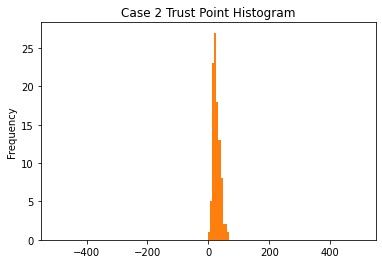

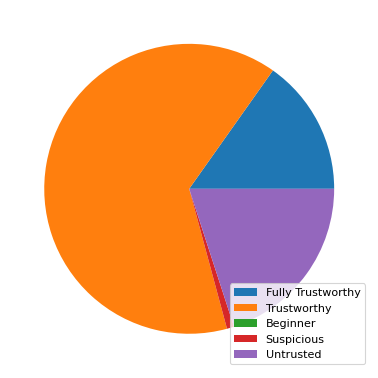

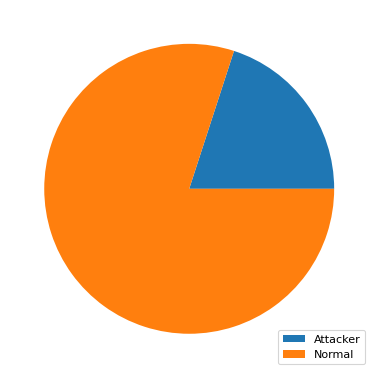

In [133]:
data[1][data[0]>=100].plot.hist(bins=150, title="Case 2 Trust Point Histogram",range=(-500,500))
data[1][data[0]<100].plot.hist(bins=150, title="Case 2 Trust Point Histogram",range=(-500,500))
states = getTrustStatesCounts(data)
plotPie(states,NUMBER_OF_NODE_ATTACKER,NUMBER_OF_NODE)

In [135]:
print("Mean of Normal Nodes", data[1][data[0]<100].mean())
print("Mean of Attacker Nodes", data[1][data[0]>=100].mean())
print("STD", data[1].std())
print("Variance", data[1].var())
print("Success %", data[4][data[0]<100].mean()*100)

Mean of Normal Nodes 26.920570118395755
Mean of Attacker Nodes -1.0725266427217044e+42
STD 2.253341194240367e+42
Variance 5.077546537660604e+84
Success % 99.26375
